# CPSC 4970 AI + ML: Module 5 -- Multilayer perceptron classifier for MNIST images

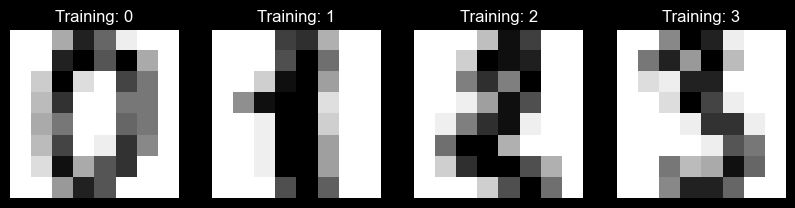

In [21]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use('dark_background')

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# Train/test split

In [22]:
X_train, X_test, y_train, y_test, image_train, image_test = train_test_split(
    digits.data, digits.target, digits.images, test_size=0.33
)

In [23]:
classifier = MLPClassifier(hidden_layer_sizes=[64, 8], max_iter=2000)
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[64, 8], max_iter=2000)

Training accuracy:  0.9966749792186201


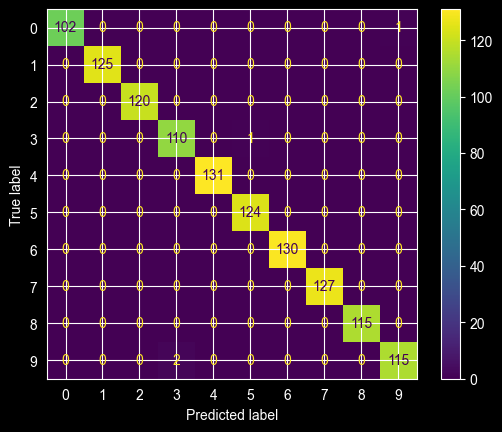

In [24]:
print("Training accuracy: ", accuracy_score(y_train, classifier.predict(X_train)))
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train)

Testing accuracy:  0.9461279461279462


/var/folders/w8/45_ypnkn34l4hflflnxn4frw0000gn/T/ipykernel_16547/2251951742.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


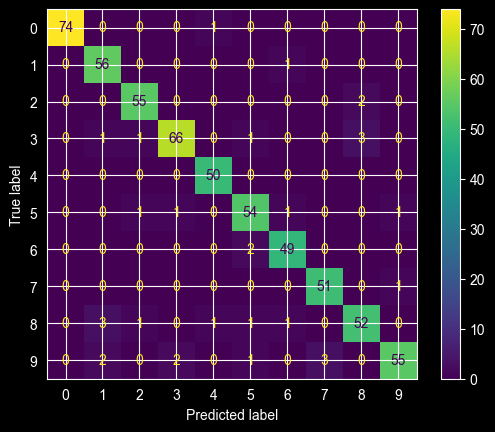

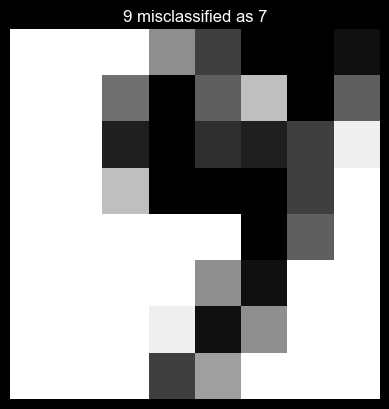

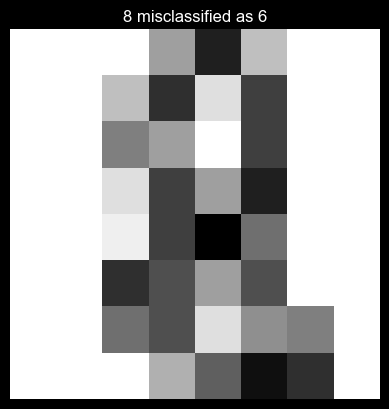

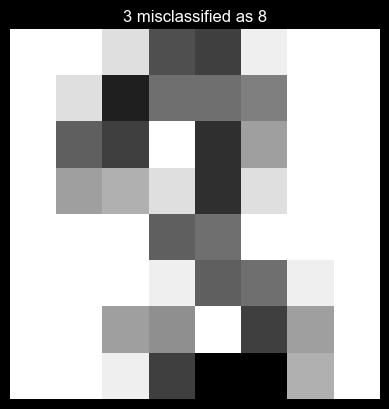

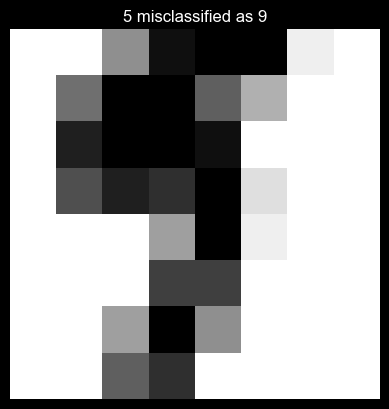

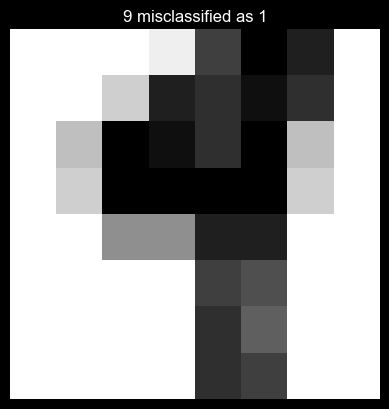

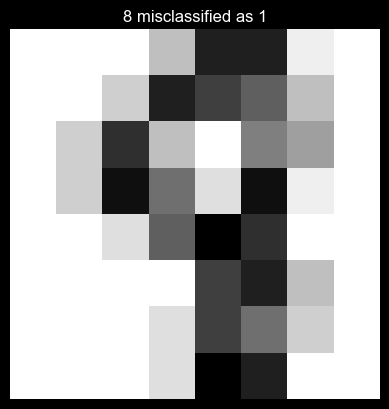

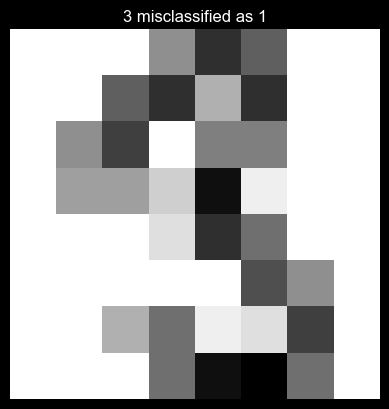

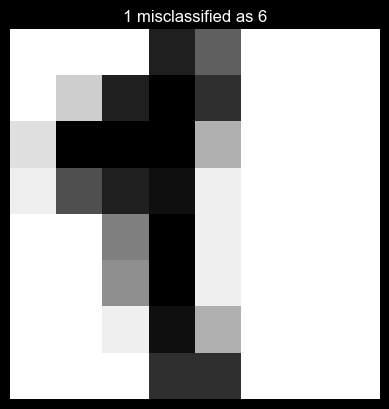

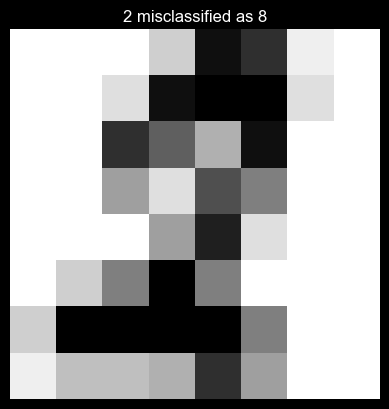

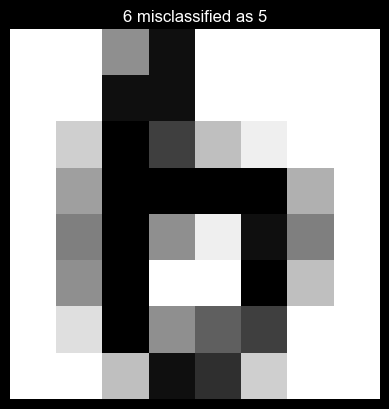

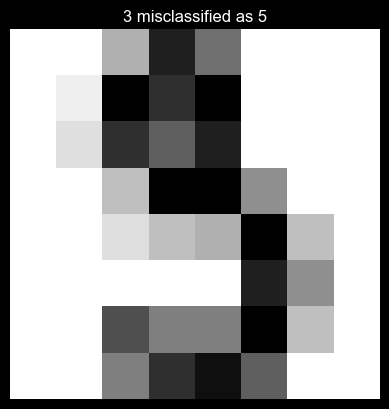

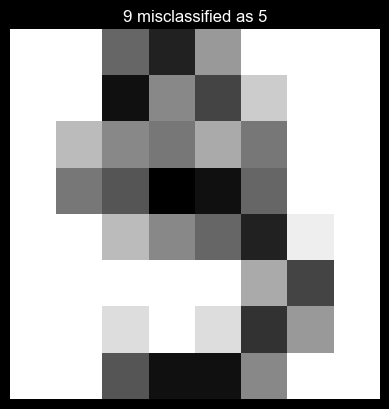

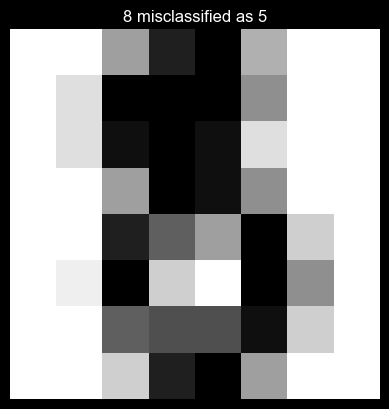

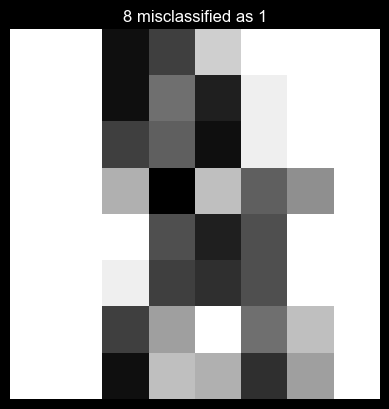

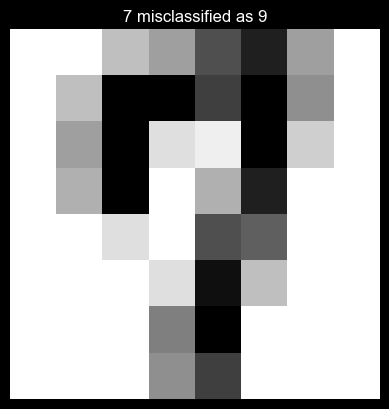

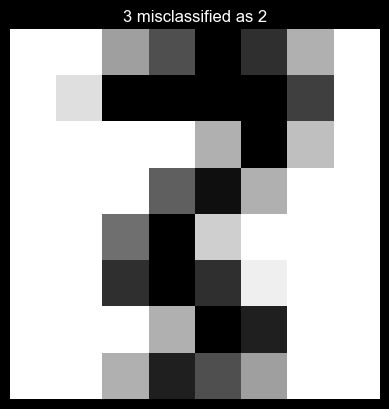

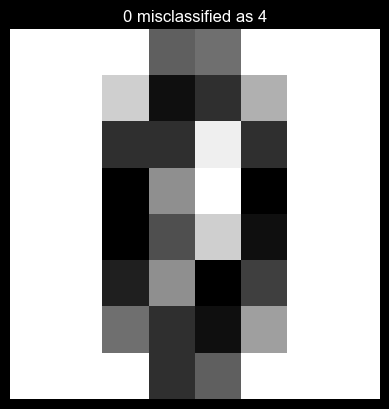

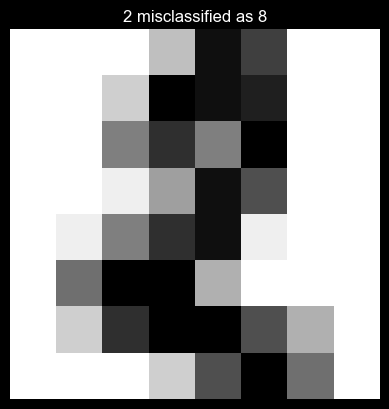

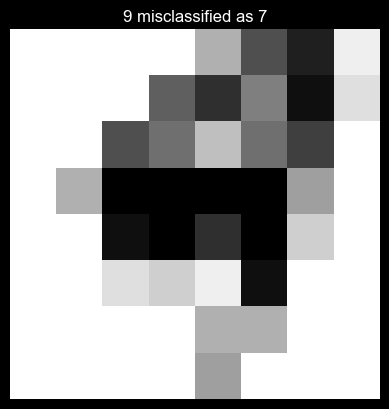

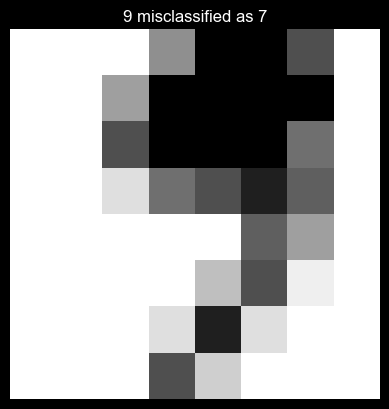

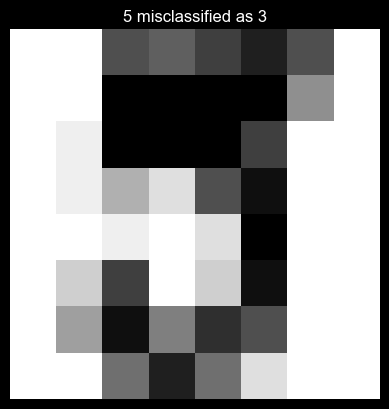

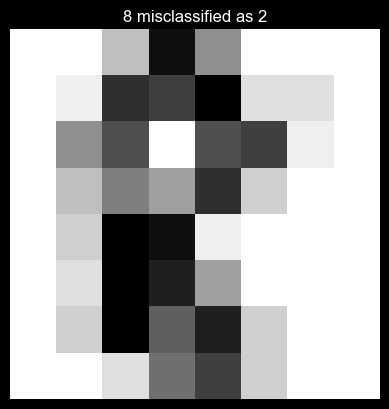

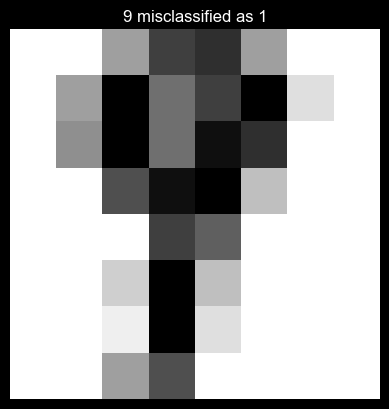

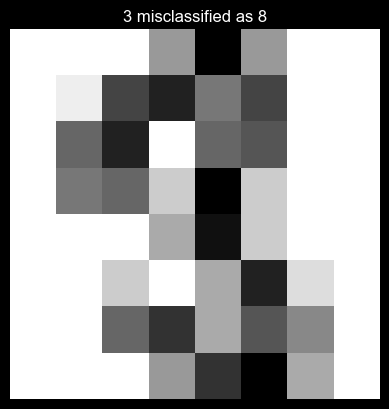

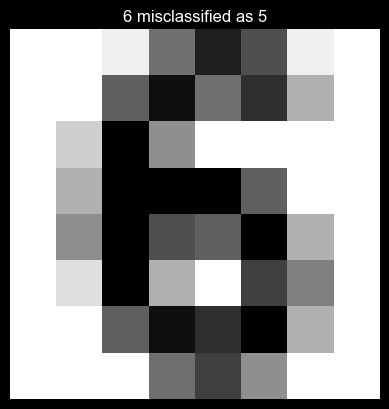

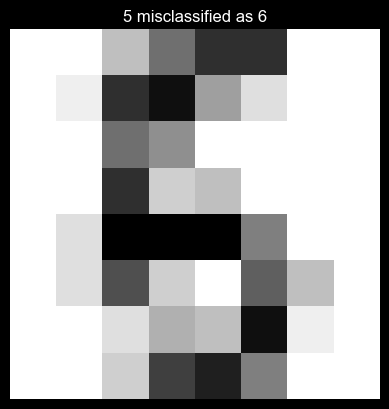

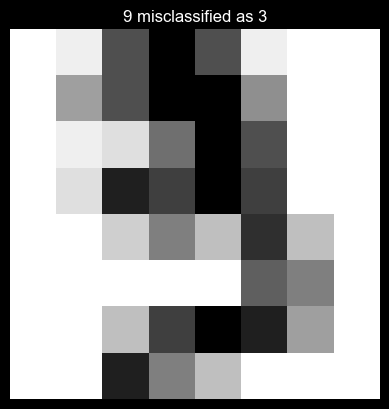

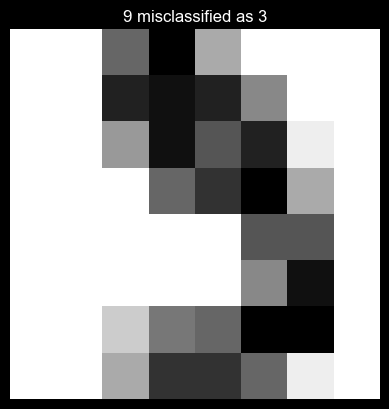

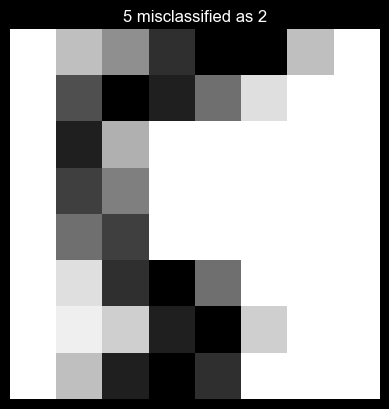

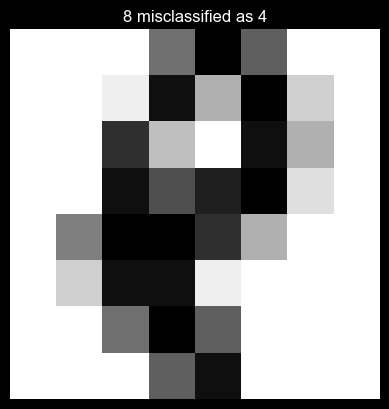

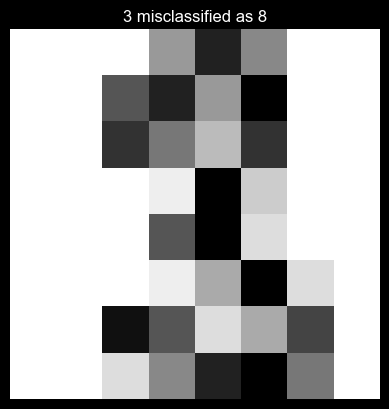

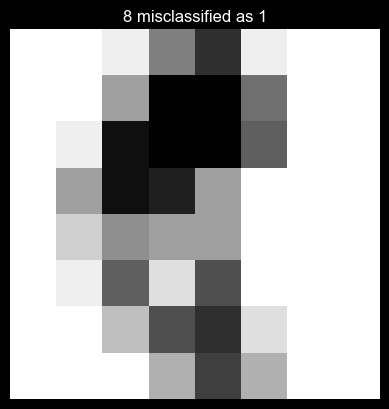

In [25]:
print("Testing accuracy: ", accuracy_score(y_test, classifier.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

for ex_x, ex_y, ex_image in zip(X_test, y_test, image_test):
    predicted = classifier.predict([ex_x])[0]
    if predicted != ex_y:
        plt.figure()
        plt.axis(False)
        plt.imshow(ex_image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(f'{ex_y} misclassified as {predicted}')

